### The Newton-Raphson method: A Fast Root-Finding Algorithm

The Newton-Raphson method, often called Newton's method, is a powerful and fast numerical technique for finding successively better approximations to the roots (or zeros) of a real-valued function. In simpler terms, it's a way to find the $x$-value where a function $f(x)$ crosses the x-axis, i.e., where $f(x) = 0$.

-----


### The Core Idea: Tangent Lines as Approximations

Imagine you're standing on a curved hill represented by a function, $f(x)$, and you want to find where the hill meets the flat ground (the x-axis).

1.  **Make a Guess:** You start at some point on the hill, let's call your initial guess $x_0$.
2.  **Find the Tangent:** At that point, $(x_0, f(x_0))$, you find the slope of the hill. This slope is given by the derivative, $f'(x_0)$. You then draw a straight line that just touches the curve at your point—this is the **tangent line**.
3.  **Follow the Tangent:** Instead of following the curve (which is complex), you follow this straight tangent line down until it hits the ground (the x-axis). This intersection point, let's call it $x_1$, is your new, improved guess for the root.
4.  **Repeat:** You then repeat the process from $x_1$. You go up to the curve at $(x_1, f(x_1))$, draw a new tangent line, and follow it down to the x-axis to get your next guess, $x_2$.

You keep repeating this process, and you'll often find that you zoom in on the actual root incredibly quickly.

Mathematically, the formula to get from one guess, $x_n$, to the next, $x_{n+1}$, is derived from the equation of the tangent line. It is:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

Here:

  * $x_n$ is your **current guess**.
  * $f(x_n)$ is the value of the function at your current guess.
  * $f'(x_n)$ is the value of the derivative (the slope) at your current guess.
  * $x_{n+1}$ is your **next, improved guess**.

-----



### The Algorithm Step-by-Step

The process is straightforward:

1.  **Define the Function:** Identify the function $f(x)$ you want to find the root of.
2.  **Find the Derivative:** Calculate the derivative of the function, $f'(x)$.
3.  **Make an Initial Guess:** Choose an initial starting point, $x_0$. A good guess is crucial!
4.  **Iterate:** Apply the Newton-Raphson formula repeatedly to generate a sequence of approximations ($x_1, x_2, x_3, \ldots$).
5.  **Stop:** Continue iterating until the change between successive guesses ($|x_{n+1} - x_n|$) is smaller than a desired tolerance (e.g., $10^{-8}$), or when $f(x_n)$ is very close to zero.

#### When Can It Go Wrong?

Newton's method is fast, but not foolproof. It can fail if:

  * **The derivative is zero:** If $f'(x_n) = 0$, you'll have division by zero. Geometrically, this means the tangent line is horizontal and will never intersect the x-axis.
  * **Bad Initial Guess:** A poor starting guess can cause the iterations to diverge and wander off to infinity or get stuck in an oscillation.
  * **Stationary Points:** If your guess is near a local maximum or minimum, the method can perform poorly.

-----



### Example: Finding the Root of $f(x) = x^3 - x - 1$

Let's find the root of the function $f(x) = x^3 - x - 1$.

1.  **Function:** $f(x) = x^3 - x - 1$
2.  **Derivative:** $f'(x) = 3x^2 - 1$
3.  **Initial Guess:** Let's look at a plot of the function. It seems to cross the x-axis somewhere between 1 and 2. Let's pick an initial guess of $x_0 = 1.5$.

Now, let's iterate:

  * **Iteration 1:**
    $f(1.5) = (1.5)^3 - 1.5 - 1 = 3.375 - 1.5 - 1 = 0.875$
    $f'(1.5) = 3(1.5)^2 - 1 = 3(2.25) - 1 = 5.75$
    $x_1 = 1.5 - \frac{0.875}{5.75} \approx 1.347826$

  * **Iteration 2:**
    $f(1.347826) \approx 0.10068$
    $f'(1.347826) \approx 4.44991$
    $x_2 = 1.347826 - \frac{0.10068}{4.44991} \approx 1.325200$

  * **Iteration 3:**
    $f(1.325200) \approx 0.00206$
    $f'(1.325200) \approx 4.26847$
    $x_3 = 1.325200 - \frac{0.00206}{4.26847} \approx 1.324718$

  * **Iteration 4:**
    $f(1.324718) \approx 0.0000001$
    ...and we can stop here. The root is approximately **1.324718**. Notice how quickly the value of $f(x)$ got close to zero\!

-----




### Python Implementation

Here's how to implement this in Python using `numpy` for calculations and `matplotlib` for plotting.

In [8]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [9]:

# Define the function and its derivative
def f(x):
    return x**3 - x - 1

def f_prime(x):
    return 3*x**2 - 1

In [10]:

def newton_raphson(initial_guess, tolerance=1e-8, max_iterations=100):
    """
    Finds the root of a function using the Newton-Raphson method.
    
    Args:
        initial_guess (float): The starting point for the iteration.
        tolerance (float): The desired precision of the result.
        max_iterations (int): The maximum number of iterations to perform.
        
    Returns:
        A tuple containing the root, the history of guesses, and f(root).
    """
    x_n = initial_guess
    history = [x_n] # Store the guesses to visualize them later

    for i in range(max_iterations):
        fx = f(x_n)
        fpx = f_prime(x_n)

        # Check for division by zero (horizontal tangent)
        if abs(fpx) < 1e-12:
            print("Derivative is zero. Newton's method fails.")
            return None, history, fx

        # Calculate the next guess
        x_next = x_n - fx / fpx
        history.append(x_next)

        # Check for convergence
        if abs(x_next - x_n) < tolerance:
            print(f"Converged after {i+1} iterations.")
            return x_next, history, f(x_next)
        
        x_n = x_next

    print("Exceeded maximum iterations. Did not converge.")
    return None, history, f(x_n)


Converged after 5 iterations.

Initial Guess: x_0 = 1.5
Calculated Root: x = 1.32471796
Value of f(x) at root: f(1.32471796) = 2.22044605e-16


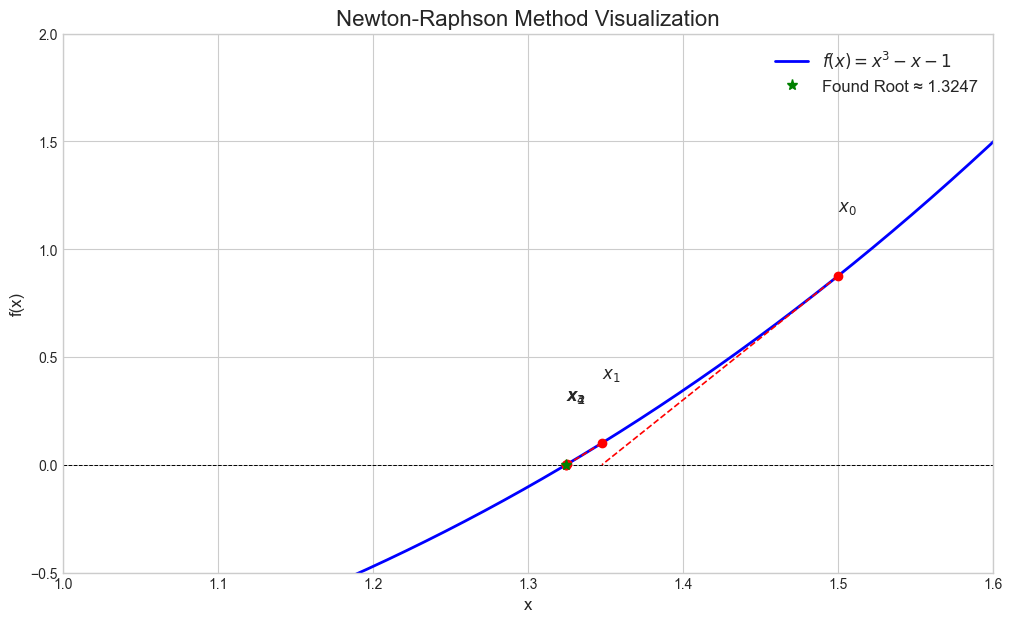

In [17]:
# --- Main Execution ---
# Set an initial guess
x0 = 1.5

# Run the method
root, guesses, f_root = newton_raphson(x0)

if root is not None:
    print(f"\nInitial Guess: x_0 = {x0}")
    print(f"Calculated Root: x = {root:.8f}")
    print(f"Value of f(x) at root: f({root:.8f}) = {f_root:.8e}")

# --- Plotting ---
# Create a range of x values for plotting the function
x_vals = np.linspace(0, 2.5, 400)
y_vals = f(x_vals)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the function
ax.plot(x_vals, y_vals, label='$f(x) = x^3 - x - 1$', color='blue', linewidth=2)
ax.axhline(0, color='black', linestyle='--', linewidth=0.7) # x-axis

# Plot the iterative steps
for i in range(len(guesses) - 1):
    x_i = guesses[i]
    x_i_plus_1 = guesses[i+1]
    
    # Plot the point on the curve
    ax.plot(x_i, f(x_i), 'ro') 
    
    # Plot the tangent line from (x_i, f(x_i)) to (x_{i+1}, 0)
    ax.plot([x_i, x_i_plus_1], [f(x_i), 0], 'r--', linewidth=1.2)
    
    ax.text(x_i, f(x_i) + 0.3, f'$x_{i}$', fontsize=12)

# Mark the final root
if root is not None:
    ax.plot(root, f(root), 'g*', markersize=8, label=f'Found Root ≈ {root:.4f}')

# Formatting the plot
ax.set_title("Newton-Raphson Method Visualization", fontsize=16)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("f(x)", fontsize=12)
ax.set_ylim(-0.5, 2)
ax.set_xlim(1, 1.6)
ax.legend(fontsize=12)
ax.grid(True)

plt.show()

-----

### Exercise 1: Find root for $x = 5 \cos(x)$ using Newton-Raphson Method

Implement the Newton-Raphson method to find the root of the equation $x = 5 \cos(x)$. Answer the following questions:

- What is your function $f(x)$ to be used in Newton-Raphson method?
- What is/are your initial guess(es)? How did you choose it?
- What is your tolerance?
- What is/are your roots? How many roots are there?
- What is your accuracy?
- What is the difference between accuracy and tolerance?
- How many iterations did it take to converge?

-----

### Exercise 2: Does the bisection method work for $f(x) = x^2$?

Why or why not? Explain. If it works, try to find the root using this method.